In [4]:
import os
from torchvision import transforms
from torch.utils.data import Dataset
from PIL import Image
from torch.utils.data import DataLoader


class PrintedDigitsDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        self.root_dir = root_dir
        self.transform = transform
        self.samples = []

        for font_folder in os.listdir(root_dir):
            font_path = os.path.join(root_dir, font_folder)
            if os.path.isdir(font_path):
                for label in os.listdir(font_path):
                    label_path = os.path.join(font_path, label)
                    if os.path.isdir(label_path):
                        for image_file in os.listdir(label_path):
                            image_path = os.path.join(label_path, image_file)
                            self.samples.append((image_path, int(label)))

    def __len__(self):
        return len(self.samples)

    def __getitem__(self, idx):
        image_path, label = self.samples[idx]
        image = Image.open(image_path).convert("RGB")
        if self.transform:
            image = self.transform(image)
        return image, label

transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=1),
    transforms.Resize((28, 28)),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

data_path = "./printed_digits"
train_dataset = PrintedDigitsDataset(root_dir=data_path, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)

# print(f"Total samples: {len(train_dataset)}")


In [5]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class DigitClassifier(nn.Module):
    def __init__(self, num_classes=10):
        super(DigitClassifier, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.fc1 = nn.Linear(64 * 7 * 7, 128)
        self.fc2 = nn.Linear(128, num_classes)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.max_pool2d(x, 2)
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x, 2)
        x = x.view(x.size(0), -1)  # Flatten
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x


In [6]:
import torch.optim as optim

model = DigitClassifier(num_classes=10)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

def train_model(model, train_loader, optimizer, criterion, epochs=5):
    model.train()
    for epoch in range(epochs):
        total_loss = 0
        correct = 0
        total = 0

        for images, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            total_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            correct += (predicted == labels).sum().item()
            total += labels.size(0)

        accuracy = 100 * correct / total
        print(f"Epoch {epoch+1}/{epochs}, Loss: {total_loss:.4f}, Accuracy: {accuracy:.2f}%")

train_model(model, train_loader, optimizer, criterion, epochs=50)


Epoch 1/50, Loss: 9.3809, Accuracy: 18.00%
Epoch 2/50, Loss: 8.9409, Accuracy: 24.00%
Epoch 3/50, Loss: 8.8852, Accuracy: 10.00%
Epoch 4/50, Loss: 8.3283, Accuracy: 32.00%
Epoch 5/50, Loss: 7.7466, Accuracy: 48.00%
Epoch 6/50, Loss: 6.8954, Accuracy: 60.00%
Epoch 7/50, Loss: 5.6194, Accuracy: 80.00%
Epoch 8/50, Loss: 5.4467, Accuracy: 66.00%
Epoch 9/50, Loss: 4.2761, Accuracy: 72.00%
Epoch 10/50, Loss: 3.1454, Accuracy: 82.00%
Epoch 11/50, Loss: 2.2309, Accuracy: 80.00%
Epoch 12/50, Loss: 2.4109, Accuracy: 80.00%
Epoch 13/50, Loss: 1.5198, Accuracy: 94.00%
Epoch 14/50, Loss: 1.2443, Accuracy: 92.00%
Epoch 15/50, Loss: 0.8572, Accuracy: 98.00%
Epoch 16/50, Loss: 0.4948, Accuracy: 100.00%
Epoch 17/50, Loss: 0.3824, Accuracy: 100.00%
Epoch 18/50, Loss: 0.2696, Accuracy: 100.00%
Epoch 19/50, Loss: 0.2192, Accuracy: 100.00%
Epoch 20/50, Loss: 0.1719, Accuracy: 100.00%
Epoch 21/50, Loss: 0.1432, Accuracy: 100.00%
Epoch 22/50, Loss: 0.1491, Accuracy: 100.00%
Epoch 23/50, Loss: 0.1056, Accurac

In [7]:
torch.save(model.state_dict(), "digit_classifier.pth")
print("Model saved!")


Model saved!


In [8]:
def test_model(model, test_loader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in test_loader:
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            correct += (predicted == labels).sum().item()
            total += labels.size(0)
    accuracy = 100 * correct / total
    print(f"Test Accuracy: {accuracy:.2f}%")


Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:01<00:00, 8665695.63it/s] 


Extracting ./data\MNIST\raw\train-images-idx3-ubyte.gz to ./data\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 1176097.53it/s]


Extracting ./data\MNIST\raw\train-labels-idx1-ubyte.gz to ./data\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 4610732.59it/s]


Extracting ./data\MNIST\raw\t10k-images-idx3-ubyte.gz to ./data\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 1911168.62it/s]


Extracting ./data\MNIST\raw\t10k-labels-idx1-ubyte.gz to ./data\MNIST\raw



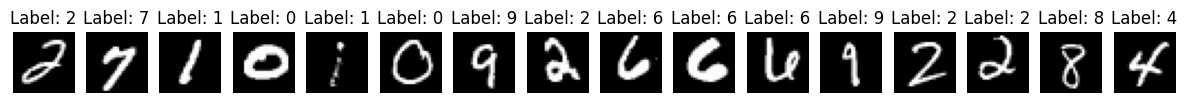

In [9]:
import matplotlib.pyplot as plt
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

mnist_transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=1),
    transforms.Resize((28, 28)),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

mnist_test_dataset = datasets.MNIST(
    root="./data",
    train=False,
    download=True,
    transform=mnist_transform
)

mnist_test_loader = DataLoader(mnist_test_dataset, batch_size=16, shuffle=True)


def show_mnist_images(data_loader):
    data_iter = iter(data_loader)
    images, labels = next(data_iter)
    images = images.squeeze(1)

    fig, axes = plt.subplots(1, len(images), figsize=(15, 5))
    for idx, (img, label) in enumerate(zip(images, labels)):
        axes[idx].imshow(img.numpy(), cmap="gray")
        axes[idx].set_title(f"Label: {label.item()}")
        axes[idx].axis("off")
    plt.show()

show_mnist_images(mnist_test_loader)


In [10]:
model = DigitClassifier(num_classes=10)
model.load_state_dict(torch.load("digit_classifier.pth"))

test_model(model, mnist_test_loader)


Test Accuracy: 10.13%
